<a href="https://colab.research.google.com/github/WeegorMartins/Analise-e-Previsao-de-Vendas-no-Ecommerce/blob/main/Otimiza%C3%A7%C3%A3o_de_Pre%C3%A7os_e_Previs%C3%A3o_de_Vendas_com_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
features_data = pd.read_csv('features.csv')
stores_data = pd.read_csv('stores.csv')

In [63]:
# Examinando as primeiras linhas de cada dataset
train_data_head = train_data.head()
test_data_head = test_data.head()
stores_data_head = stores_data.head()
features_data_head = features_data.head()

# Verificando os tamanhos de cada dataset
train_shape = train_data.shape
test_shape = test_data.shape
stores_shape = stores_data.shape
features_shape = features_data.shape

(train_data_head, test_data_head, stores_data_head, features_data_head, train_shape, test_shape, stores_shape, features_shape)

(   Store  Dept        Date  Weekly_Sales  IsHoliday
 0      1     1  2010-02-05      24924.50      False
 1      1     1  2010-02-12      46039.49       True
 2      1     1  2010-02-19      41595.55      False
 3      1     1  2010-02-26      19403.54      False
 4      1     1  2010-03-05      21827.90      False,
    Store  Dept        Date  IsHoliday
 0      1     1  2012-11-02      False
 1      1     1  2012-11-09      False
 2      1     1  2012-11-16      False
 3      1     1  2012-11-23       True
 4      1     1  2012-11-30      False,
    Store Type    Size
 0      1    A  151315
 1      2    A  202307
 2      3    B   37392
 3      4    A  205863
 4      5    B   34875,
    Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
 0      1  2010-02-05        42.31       2.572        NaN        NaN   
 1      1  2010-02-12        38.51       2.548        NaN        NaN   
 2      1  2010-02-19        39.93       2.514        NaN        NaN   
 3      1  2010-02-

In [64]:
# Convertendo as datas para formato datetime para facilitar análise
train_data['Date'] = pd.to_datetime(train_data['Date'])
test_data['Date'] = pd.to_datetime(test_data['Date'])
features_data['Date'] = pd.to_datetime(features_data['Date'])

# Unindo os datasets
train_merged = train_data.merge(stores_data, on='Store').merge(features_data, on=['Store', 'Date'])
test_merged = test_data.merge(stores_data, on='Store').merge(features_data, on=['Store', 'Date'])

# Verificando os dados consolidados
train_merged_head = train_merged.head()
test_merged_head = test_merged.head()

# Resumo da integração e dados ausentes
train_missing = train_merged.isnull().sum()
test_missing = test_merged.isnull().sum()

(train_merged_head, test_merged_head, train_missing, test_missing)

(   Store  Dept       Date  Weekly_Sales  IsHoliday_x Type    Size  \
 0      1     1 2010-02-05      24924.50        False    A  151315   
 1      1     1 2010-02-12      46039.49         True    A  151315   
 2      1     1 2010-02-19      41595.55        False    A  151315   
 3      1     1 2010-02-26      19403.54        False    A  151315   
 4      1     1 2010-03-05      21827.90        False    A  151315   
 
    Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
 0        42.31       2.572        NaN        NaN        NaN        NaN   
 1        38.51       2.548        NaN        NaN        NaN        NaN   
 2        39.93       2.514        NaN        NaN        NaN        NaN   
 3        46.63       2.561        NaN        NaN        NaN        NaN   
 4        46.50       2.625        NaN        NaN        NaN        NaN   
 
    MarkDown5         CPI  Unemployment  IsHoliday_y  
 0        NaN  211.096358         8.106        False  
 1        NaN  2

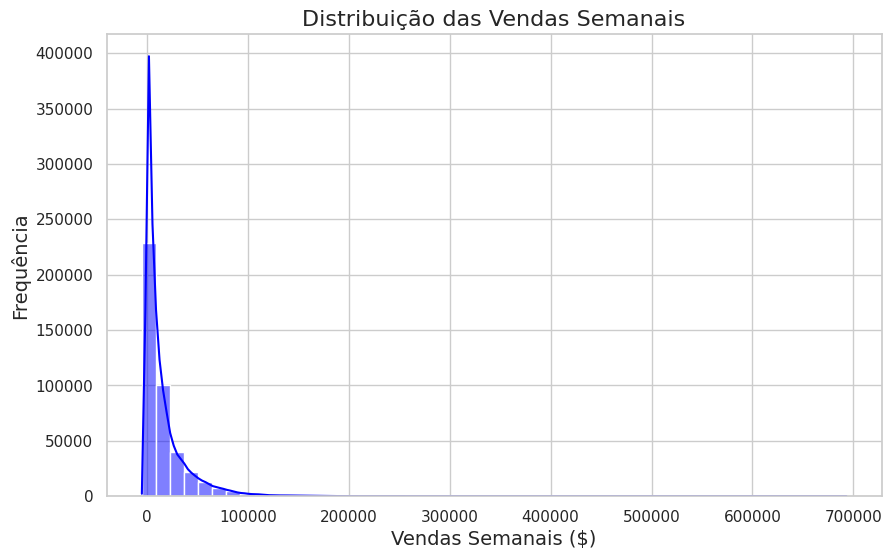

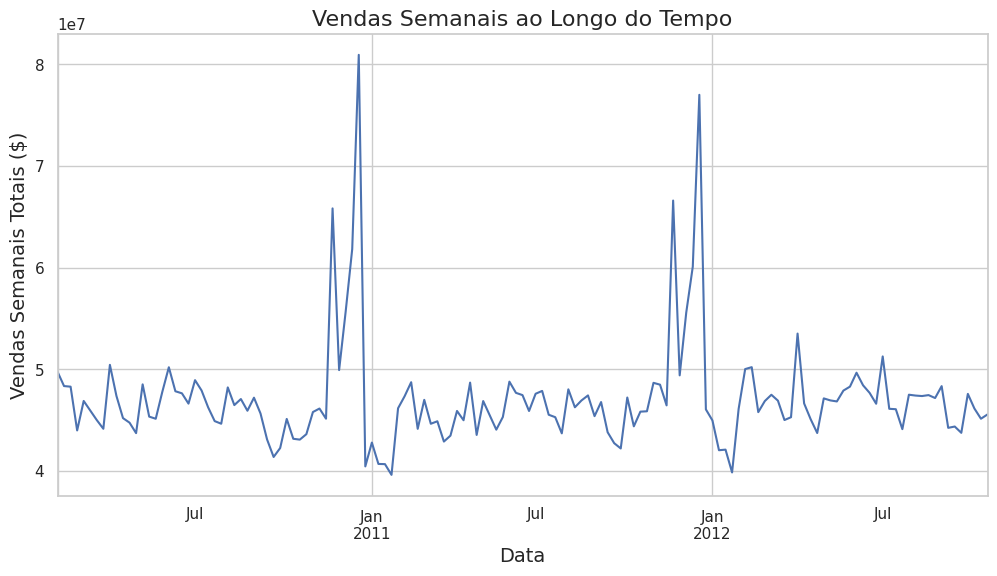

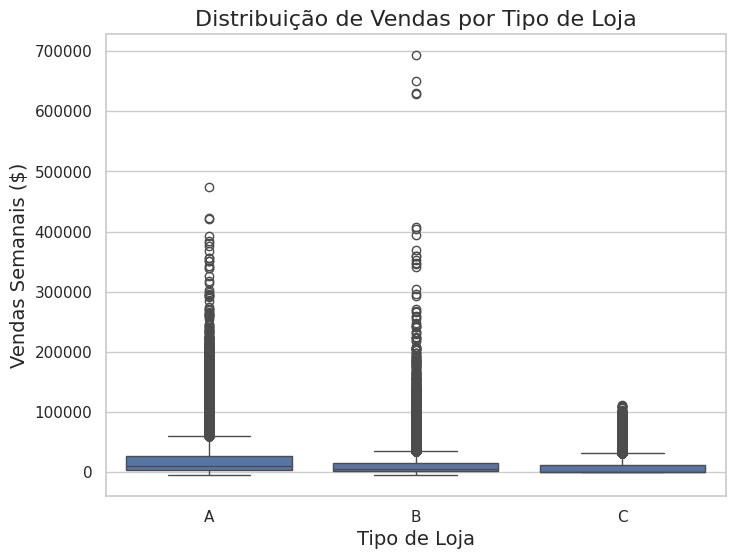

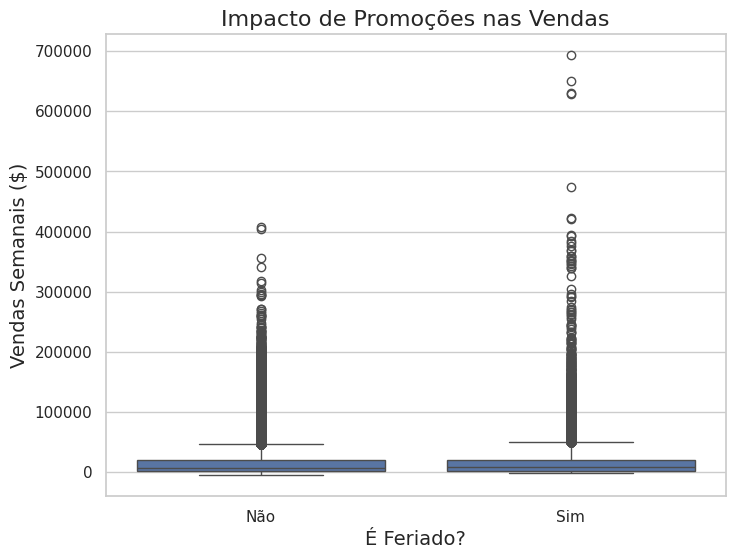

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração de estilo para os gráficos
sns.set(style="whitegrid")

# Análise da distribuição das vendas semanais
plt.figure(figsize=(10, 6))
sns.histplot(train_merged['Weekly_Sales'], kde=True, bins=50, color='blue')
plt.title('Distribuição das Vendas Semanais', fontsize=16)
plt.xlabel('Vendas Semanais ($)', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.show()

# Sazonalidade: vendas semanais ao longo do tempo
plt.figure(figsize=(12, 6))
train_merged.groupby('Date')['Weekly_Sales'].sum().plot()
plt.title('Vendas Semanais ao Longo do Tempo', fontsize=16)
plt.xlabel('Data', fontsize=14)
plt.ylabel('Vendas Semanais Totais ($)', fontsize=14)
plt.show()

# Análise de vendas por tipo de loja
plt.figure(figsize=(8, 6))
sns.boxplot(x='Type', y='Weekly_Sales', data=train_merged)
plt.title('Distribuição de Vendas por Tipo de Loja', fontsize=16)
plt.xlabel('Tipo de Loja', fontsize=14)
plt.ylabel('Vendas Semanais ($)', fontsize=14)
plt.show()

# Impacto de promoções (IsHoliday)
plt.figure(figsize=(8, 6))
sns.boxplot(x='IsHoliday_x', y='Weekly_Sales', data=train_merged)
plt.title('Impacto de Promoções nas Vendas', fontsize=16)
plt.xlabel('É Feriado?', fontsize=14)
plt.ylabel('Vendas Semanais ($)', fontsize=14)
plt.xticks([0, 1], ['Não', 'Sim'])
plt.show()

In [66]:
# Tratamento de Dados Ausentes

# Substituindo valores ausentes nas variáveis MarkDown com 0 (assumindo que a falta de valores indica ausência de promoções)
mark_down_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
train_merged[mark_down_cols] = train_merged[mark_down_cols].fillna(0)
test_merged[mark_down_cols] = test_merged[mark_down_cols].fillna(0)

# Substituindo valores ausentes em CPI e Unemployment com a média por loja
train_merged['CPI'] = train_merged.groupby('Store')['CPI'].transform(lambda x: x.fillna(x.mean()))
train_merged['Unemployment'] = train_merged.groupby('Store')['Unemployment'].transform(lambda x: x.fillna(x.mean()))

test_merged['CPI'] = test_merged.groupby('Store')['CPI'].transform(lambda x: x.fillna(x.mean()))
test_merged['Unemployment'] = test_merged.groupby('Store')['Unemployment'].transform(lambda x: x.fillna(x.mean()))

# Verificando valores ausentes após tratamento
train_missing_after = train_merged.isnull().sum()
test_missing_after = test_merged.isnull().sum()

# Adicionando variáveis sazonais
train_merged['Year'] = train_merged['Date'].dt.year
train_merged['Month'] = train_merged['Date'].dt.month
train_merged['Week'] = train_merged['Date'].dt.isocalendar().week
train_merged['Day'] = train_merged['Date'].dt.day

test_merged['Year'] = test_merged['Date'].dt.year
test_merged['Month'] = test_merged['Date'].dt.month
test_merged['Week'] = test_merged['Date'].dt.isocalendar().week
test_merged['Day'] = test_merged['Date'].dt.day

# Criando uma variável para identificar feriados relevantes como sazonalidade
relevant_holidays = [pd.Timestamp('2010-11-26'), pd.Timestamp('2011-11-25'), pd.Timestamp('2012-11-23'),
                     pd.Timestamp('2010-12-25'), pd.Timestamp('2011-12-25'), pd.Timestamp('2012-12-25')]

train_merged['IsRelevantHoliday'] = train_merged['Date'].isin(relevant_holidays)
test_merged['IsRelevantHoliday'] = test_merged['Date'].isin(relevant_holidays)

# Verificando os dados processados
train_merged_head = train_merged.head()
test_merged_head = test_merged.head()

(train_missing_after, test_missing_after, train_merged_head, test_merged_head)

(Store           0
 Dept            0
 Date            0
 Weekly_Sales    0
 IsHoliday_x     0
 Type            0
 Size            0
 Temperature     0
 Fuel_Price      0
 MarkDown1       0
 MarkDown2       0
 MarkDown3       0
 MarkDown4       0
 MarkDown5       0
 CPI             0
 Unemployment    0
 IsHoliday_y     0
 dtype: int64,
 Store           0
 Dept            0
 Date            0
 IsHoliday_x     0
 Type            0
 Size            0
 Temperature     0
 Fuel_Price      0
 MarkDown1       0
 MarkDown2       0
 MarkDown3       0
 MarkDown4       0
 MarkDown5       0
 CPI             0
 Unemployment    0
 IsHoliday_y     0
 dtype: int64,
    Store  Dept       Date  Weekly_Sales  IsHoliday_x Type    Size  \
 0      1     1 2010-02-05      24924.50        False    A  151315   
 1      1     1 2010-02-12      46039.49         True    A  151315   
 2      1     1 2010-02-19      41595.55        False    A  151315   
 3      1     1 2010-02-26      19403.54        False    A  151

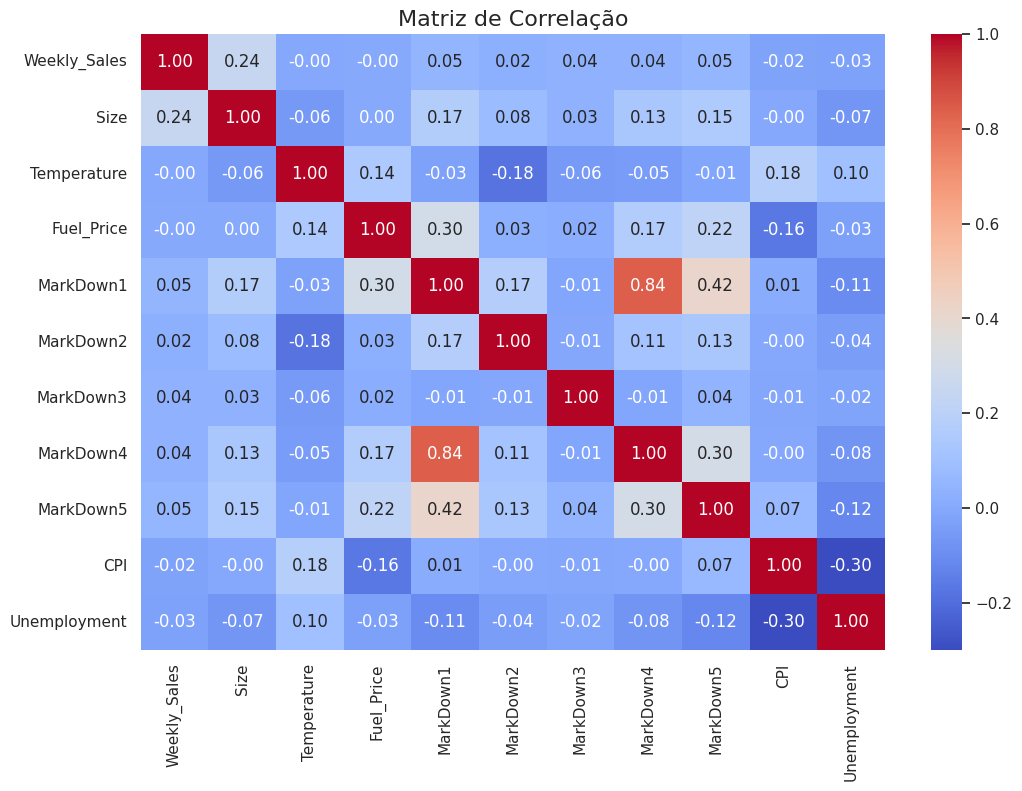

(Weekly_Sales    1.000000
 Size            0.243828
 MarkDown5       0.050465
 MarkDown1       0.047172
 MarkDown3       0.038562
 MarkDown4       0.037467
 MarkDown2       0.020716
 Fuel_Price     -0.000120
 Temperature    -0.002312
 CPI            -0.020921
 Unemployment   -0.025864
 Name: Weekly_Sales, dtype: float64,
 (421570, 19),
 (115064, 19))

In [67]:
# Análise de correlação: selecionando variáveis numéricas relevantes para vendas
numerical_cols = ['Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1',
                  'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']

# Calculando a matriz de correlação
correlation_matrix = train_merged[numerical_cols].corr()

# Plotando a matriz de correlação para identificar relações com Weekly_Sales
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Matriz de Correlação', fontsize=16)
plt.show()

# Preparação dos dados para modelagem
train_merged['Type'] = train_merged['Type'].map({'A': 0, 'B': 1, 'C': 2})
test_merged['Type'] = test_merged['Type'].map({'A': 0, 'B': 1, 'C': 2})

# Transformando IsHoliday e IsRelevantHoliday em inteiros
train_merged['IsHoliday_x'] = train_merged['IsHoliday_x'].astype(int)
train_merged['IsRelevantHoliday'] = train_merged['IsRelevantHoliday'].astype(int)
test_merged['IsHoliday_x'] = test_merged['IsHoliday_x'].astype(int)
test_merged['IsRelevantHoliday'] = test_merged['IsRelevantHoliday'].astype(int)

# Separando variáveis preditoras e alvo
X_train = train_merged.drop(['Weekly_Sales', 'Date', 'IsHoliday_y'], axis=1)
y_train = train_merged['Weekly_Sales']
X_test = test_merged.drop(['Date', 'IsHoliday_y'], axis=1)

# Checando as dimensões dos conjuntos de dados
X_train_shape = X_train.shape
X_test_shape = X_test.shape

(correlation_matrix['Weekly_Sales'].sort_values(ascending=False), X_train_shape, X_test_shape)

In [68]:
# Redefinindo R² para os modelos
rf_r2_optimized = r2_score(y_val, rf_preds_optimized)
gb_r2_optimized = r2_score(y_val, gb_preds_optimized)

# Criando novamente a tabela de comparação
fixed_model_comparison = {
    "Model": ["Random Forest (Optimized)", "Gradient Boosting (Optimized)"],
    "RMSE": [rf_rmse_fixed, gb_rmse_fixed],
    "R²": [rf_r2_optimized, gb_r2_optimized]
}

fixed_model_comparison_df = pd.DataFrame(fixed_model_comparison)
fixed_model_comparison_df

,Model,RMSE,R²
0,Random Forest (Optimized),10016.469750,0.807603
1,Gradient Boosting (Optimized),13375.416625,0.656929


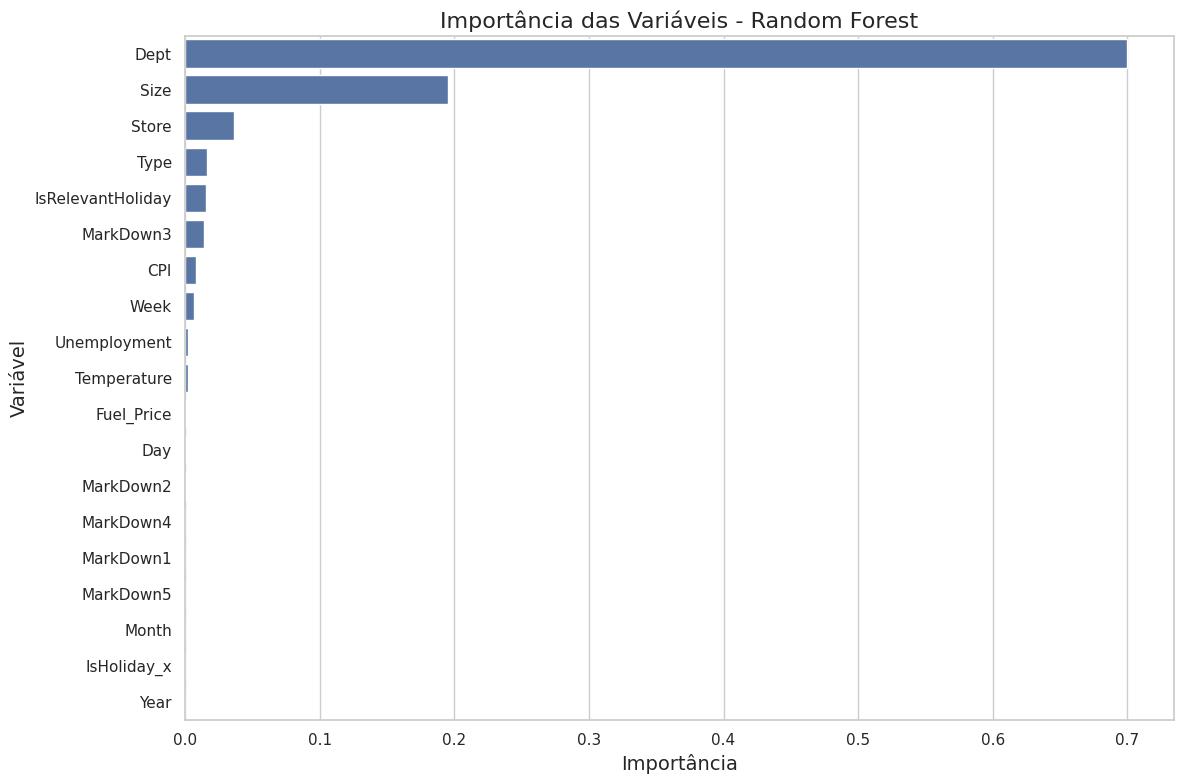

,Feature,Importance
0,Dept,0.699594
1,Size,0.195607
2,Store,0.036340
3,Type,0.016501
4,IsRelevantHoliday,0.015849
5,MarkDown3,0.013795
6,CPI,0.007889
7,Week,0.006692
8,Unemployment,0.002291
9,Temperature,0.002179


In [69]:
# Extraindo a importância das variáveis diretamente do modelo Random Forest
feature_importances = rf_model_optimized.feature_importances_
features = X_val.columns

# Criando um dataframe com as importâncias
importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

# Plotando as importâncias
plt.figure(figsize=(12, 8))
sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title("Importância das Variáveis - Random Forest", fontsize=16)
plt.xlabel("Importância", fontsize=14)
plt.ylabel("Variável", fontsize=14)
plt.tight_layout()
plt.show()

# Exibindo o dataframe de importâncias
importance_df.reset_index(drop=True)

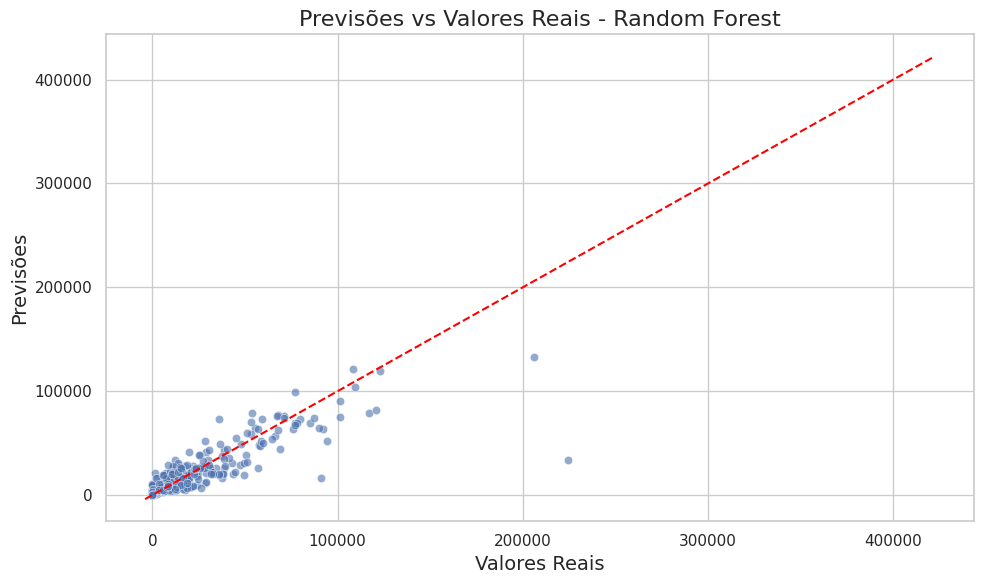

In [70]:
# Comparando previsões do modelo com os dados reais
val_results = pd.DataFrame({
    "Actual": y_val,
    "Predicted": rf_preds_optimized
})

# Amostra para visualização
sampled_results = val_results.sample(500, random_state=42)

# Plotando as previsões vs valores reais
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Actual", y="Predicted", data=sampled_results, alpha=0.6)
plt.title("Previsões vs Valores Reais - Random Forest", fontsize=16)
plt.xlabel("Valores Reais", fontsize=14)
plt.ylabel("Previsões", fontsize=14)
plt.plot([val_results.min().min(), val_results.max().max()],
         [val_results.min().min(), val_results.max().max()], color="red", linestyle="--")
plt.tight_layout()
plt.show()

In [72]:
import os

# Criando o diretório, caso não exista
output_dir = "/mnt/data/"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Salvando o notebook
notebook_path = os.path.join(output_dir, "Projeto_Machine_Learning_Previsao_Vendas.ipynb")
with open(notebook_path, "w") as f:
    f.write(nbf.writes(nb))

notebook_path

'/mnt/data/Projeto_Machine_Learning_Previsao_Vendas.ipynb'